##Predicting delivery time using sorting time 

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/delivery_time.csv')

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
data1 = data.rename({"Delivery Time" : "Delivery_Time"}, axis=1)

In [37]:
data2 = data1.rename({"Sorting Time" : "Sorting_Time"}, axis=1)

In [38]:
data2.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation

In [39]:
data2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


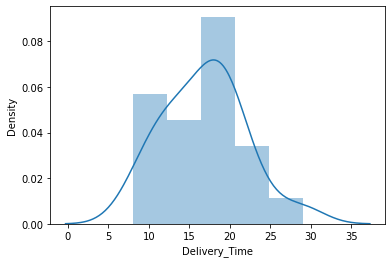

In [40]:
sns.distplot(data2['Delivery_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


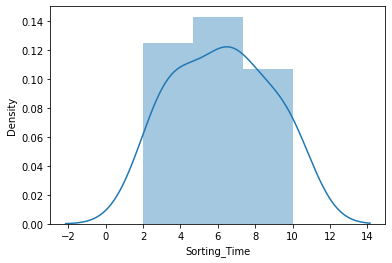

In [41]:
sns.distplot(data2['Sorting_Time'])

#Fitting the Linear Regression Model

In [43]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time ~ Sorting_Time', data=data2).fit()

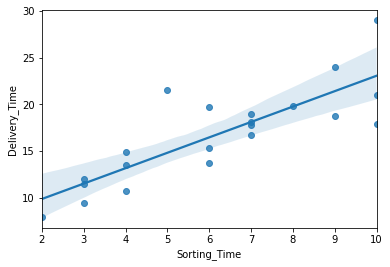

In [44]:
sns.regplot(x= 'Sorting_Time', y='Delivery_Time', data=data2)

In [46]:
#Coefficinets
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [48]:
# tvalue and p-Values
print(model.tvalues, "\n", model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


#### p-Value of Sorting_Time is less than alpha(0.05), there is a relation between both the variable

In [49]:
# R Square Value
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#### R Square value is 0.682 which is very less. equation of the model is very poor.

# Predict for new data point

In [50]:
newdata = pd.Series([25])

In [51]:
newdata

0    25
dtype: int64

In [52]:
data2_pred = pd.DataFrame(newdata, columns=["Sorting_Time"])

In [53]:
data2_pred

,Sorting_Time
0,25


In [54]:
model.predict(data2_pred)

0    47.808231
dtype: float64

#Result : Delivery time for Sortine Time 25 would be 47.80